# Riemann problem for Euler eequations with the Tammann EOS
We consider the one dimensional Riemann problem for the Euler equations with the Tammann EOS. The Tammann EOS, also known as stiffened gas EOS, is used to model almost incompressible fluids. It can be physically understood as modeling an ideal gas under very high ambient pressures. The Riemann problem we want to solve consists of the one dimensional Euler equations,

$$
\begin{align*}
    \left[\begin{array}{c} \rho \\   \rho u \\    E   \end{array} \right]_t +
    \left[\begin{array}{c} \rho u \\   \rho u^2 + p \\     u(E+p)   \end{array} \right]_x
=   0,
\end{align*}
$$

where $\rho$ is density, $u$ velocity, $E$ the internal energy and $p$ the pressure and the subcripts $x,t$ denote partial derivatives with respect $x$ and $t$. The Tamann EOS is given by 

$$
p=\rho e(\gamma -1) - \gamma p_{\infty},
$$

where $e$ the specific internal energy and $k =l,r$ determines which coefficients to use for the EOS. The initial conditions are given by the left and right constant states $q_l=[\rho_l, \rho_l u_l, E_l]$ and $q_r=[\rho_r, \rho_r u_r, E_r]$. Note that using the equation of state, the state of the system can also be written on the primitive variables $[\rho, u, p]$. 

## Exact solution

The exact solution to the Riemann problem with a Tammann EOS can be found in <cite data-cite="Ivings1998"><a href="riemann.html#Ivings1998">(Ivings & Toro 1998)<a></cite>. In the supplemental material of the work <cite data-cite="delrazo2017"><a href="riemann.html#delrazo2017">(del Razo, 2017)<a></cite>, the reader can find an extension of the analytic solution to the case where the parameters $\gamma$ and $p_\infty$ in the Tammann EOS have a discontinuity. In the following sections, we will focus in the latter since it is a more general case. Although we will not provide here the full derivation of the exact Riemann solver, we will give the outline of how we can solve it.

As we know from the previous examples, the solution of the Euler equations will consist of three waves: the 1-wave and 3-wave (rarefactions or shocks), and a 2-wave in between given by a contact discontinuity. The system will have four different solution states, $q_l,q_{*l},q_{*r},q_r$ separated by the three waves. In order to figure out if the 1-wave and 3-wave are rarefactions or shocks, we will need to create a function of the 
middle state pressure $p_*$ that ensures that the velocity $u_*$ across the contact discontinuity is consistent. As we know the velocity on the left state $u_l$ should be connected by a rarefaction or shock to $u_*$, we can 
calculate $u_*=u_l + [u]_1$ with $[u]_1$ the jump of the velocity across the 1-wave. In a similar manner, we also 
know the 3-wave should be a shock or rarefaction, so we can calculate $u_*= u_r - [u]_3$; therefore, it is useful to define

$$
\begin{align*}
  \phi_l(p_*) = u_* = u_l - \mathcal{F}_l(p_*), \\
  \phi_r(p_*) = u_* = u_r + \mathcal{F}_r(p_*).
\end{align*}
$$

where $\mathcal{F}_{l,r}(p_*) = -[u]_{1,3}$ will change form depending if it's a shock or a rarefaction (signs were 
chosen for notation consistency). As we expect these two equations yield the same contact discontinuity 
velocity $u_*$, then 

$$
\begin{align*}
 \Phi(p_*)= \phi_r(p_*) - \phi_l(p_*) = 0.
\end{align*}
$$

This nonlinear equation for $p_*$ will yield the pressure $p_*$ that provides consistency between the type of waves (rarefactions or shocks), their speeds and the contact discontinuity velocity $u_*$. As we mentioned before, the shape of $\phi_k(p_*)$ will depend on whether the states are connected by a shock wave or rarefaction. Once 
the $p_*$ has been found, the contact discontinuity velocity can be found from the expressions just derived. However, it is not yet clear how to calculate the density or the speeds of the 1-wave 
and 3-wave. How to obtain these quantities becomes obvious once we write the explicit equations for our system. The reader is referred to the supplemental material of <cite data-cite="delrazo2017"><a href="riemann.html#delrazo2017">(del Razo, 2017)<a></cite> for details in the explicit formulas.

Before coding the exact solution, we should first note that having a rarefaction or shock in the 1-wave 
and 3-wave will depend on the pressure $p_*$. How can we know which one, can be answered by simple physical 
intuition. If the pressure is higher on the side toward which the wave is propagating, it will yield a rarefaction. If the pressure is lower, it will be a shock. In the Euler equations, this yields four possible cases for the value $\Phi(p_*)$, just as in the solution with an ideal gas EOS:

 * 1-rarefaction, 3-rarefaction: $p_*< p_l$ and $p_*<p_r$  
 $\Phi(p_*)= \phi_r^R(p_*) - \phi_l^R(p_*)$,
 * 1-shock,       3-rarefaction $p_l \le p_* \le p_r$  
 $\Phi(p_*)= \phi_r^R(p_*) - \phi_l^S(p_*)$,
 * 1-rarefaction,       3-shock $p_r \le p_* \le p_l$  
 $\Phi(p_*)= \phi_r^S(p_*) - \phi_l^R(p_*)$,
 * 1-shock, 3-shock: $p_* > p_l$ and $p_*>p_r$  
 $\Phi(p_*)= \phi_r^S(p_*) - \phi_l^S(p_*)$,

where the index $S,R$ indicates if the $\phi$ was obtained by using the Rankine-Hugoniot equations to connect 
states by shocks or the Riemann invariants to connect them by rarefactions respectively.

The functions $\phi_{k}^{\mu}$ are derived in supplemental material of <cite data-cite="delrazo2017"><a href="riemann.html#delrazo2017">(del Razo, 2017)<a></cite> for all the four cases with $k=l,r$ and $\mu=R,S$, and it is also shown how to obtain the density and the missing wave speeds. For reference into the code, we denote the speed of the 1-wave, $s_l$, the 2-wave, $s_*$, and the 3-wave $s_r$.

With this, we now provide the code of the function $\Phi(p_*)$ as a function of $p_*$, the initial left and right states and the paramter values of the Tammann EOS on each side:

In [8]:
import numpy as np
def phi_exact(p, **initial_data):
    
    # Get intial data
    #q_l, q_r, gamma, pinf = initial_data
    rho_l, ul, pl = q_l
    rho_r, ur, pr = q_r
    gammal, gammar = gamma
    pinfl, pinfr = pinf
    
    # Variables for middle states
    global ustar, rhos_l, rhos_r

    # Bar pressure (convenient change of variable)
    pbl = pl + pinfl
    pbr = pr + pinfr
    # Star bar pressure
    pbsl = p + pinfl
    pbsr = p + pinfr

    # Useful parameters
    gl1 = gammal - 1.0
    gr1 = gammar - 1.0
    bl = (gammal + 1.0)/(gammal - 1.0)
    br = (gammar + 1.0)/(gammar - 1.0)
    betal = pbl/bl
    betar = pbr/br
    al = 2.0/((gammal + 1.0)*rho_l)
    ar = 2.0/((gammar + 1.0)*rho_r
             )
    # Calculate velocities (sound speed)
    cl =  np.sqrt(gammal*(pl + pinfl)/rho_l)
    cr =  np.sqrt(gammar*(pr + pinfr)/rho_r)
    
    # Calculate the rarefaction phi's 
    phil_m = ul + 2*cl/gl1*(1 - (pbsl/pbl)**(gl1/(2.0*gammal)))
    phir_m = ur - 2*cr/gr1*(1 - (pbsr/pbr)**(gr1/(2.0*gammar)))

    # Calculate the shockwave phi's
    phil_p = ul - (p - pl)*np.sqrt(al/(pbsl + betal))
    phir_p = ur + (p - pr)*np.sqrt(ar/(pbsr + betar))

    # Assign value to phi function depending on the 4 cases
    # Rarefaction - Rarefaction (use both intergal curves)
    if p <= pl and p <= pr:
        phi = phir_m - phil_m
        ustar = 0.5*(phir_m + phil_m)
        rhos_l = rho_l*(pbsl/pbl)**(1.0/gammal)
        rhos_r = rho_r*(pbsr/pbr)**(1.0/gammar)
        #print('Rarefaction-Rarefaction')
    # Shockwave - Rarefaction (use Hugoniot locus and integral curve)
    elif pl <= p  and p <= pr:
        phi = phir_m - phil_p
        ustar = 0.5*(phir_m + phil_p)
        rhos_l = rho_l*(pbsl/pbl + 1.0/bl)/(pbsl/(pbl*bl) + 1.0)
        rhos_r = rho_r*(pbsr/pbr)**(1.0/gammar)
        # print('Shockwave-Rarefaction')
    # Rarefaction - Shockwave (use integral curve and hugoniot locus)
    elif pr <= p and p <= pl:
        phi = phir_p - phil_m
        ustar = 0.5*(phir_p + phil_m)
        rhos_l = rho_l*(pbsl/pbl)**(1.0/gammal)
        rhos_r = rho_r*(pbsr/pbr + 1.0/br)/(pbsr/(pbr*br) + 1.0)
        #print('Rarefaction-Shockwave')
    # Shockwave - Shockwave (use both hugoniot locus)
    elif p >= pr and p >= pl:
        phi = phir_p - phil_p
        ustar = 0.5*(phir_p + phil_p)
        rhos_l = rho_l*(pbsl/pbl + 1.0/bl)/(pbsl/(pbl*bl) + 1.0)
        rhos_r = rho_r*(pbsr/pbr + 1.0/br)/(pbsr/(pbr*br) + 1.0)
        # print('Shockwave-Shockwave')
    return phi

Now we need to iterate this function using a Newton method, to find which value of $p_*$ yields $\Phi(p_*)=0$

In [29]:
from scipy.optimize import fsolve

# Define a left and right state (rho, u, p)
ql = [1.0, 0.0, 3.0]
qr = [0.5, 0.0, 1.0]

# Define left and right parameters for the EOS (left and right)
gamma = [1.4, 1.4]
pinf = [0.0, 0.0]

# Find the pressure that make phi = 0
p0 = (ql[2] + qr[2])/2.0 # initial guess is the average of initial pressures
pstar = fsolve(phi_exact, p0, args=(ql,qr,gamma,pinf))

# Calculate the left and right wave speeds
betal = (ql[2] + pinf[0])*(gamma[0] - 1.0)/(gamma[0] + 1.0)
betar = (qr[2] + pinf[1])*(gamma[1] - 1.0)/(gamma[1] + 1.0)
alphal = 2.0/(ql[0]*(gamma[0] + 1.0))
alphar = 2.0/(qr[0]*(gamma[1] + 1.0))
Sl = ul - np.sqrt((pstar + pinf[0] + betal)/alphal)/ql[0]
Sr = ur + np.sqrt((pstar + pinf[1] + betar)/alphar)/qr[0]

We just obtained the pressure and velocity middle states $p_*$ and $u_*$ that are continuous across the contact disconitnuity and the middle states for the density $\rho_{*L}$ and $\rho_{*R}$ have also been obtained from the function and saved as global variables. We also know the speed the left and right waves are traveling. We can now plot the solution to the Riemann problem. 

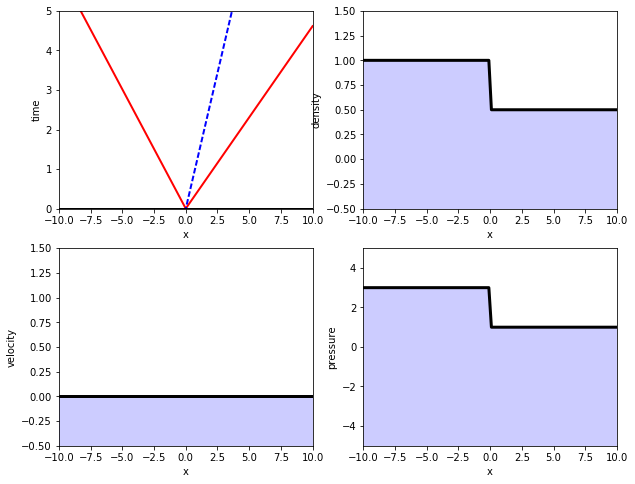

In [31]:
# NOT YET SET TO PLOT RAREFACTIONS CORRECTLY **
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
from pylab import *

# Create plotting function
def plot_riemann(time):
        
    # Create figure
    fig = plt.figure(figsize=(10, 8))
    x = np.linspace(-10,10,100)
    
    # Create subplot for (x,t) plane
    tmax = 5
    ax = fig.add_subplot(2,2,1)
    ax.set_xlabel('x')
    ax.set_ylabel('time')
    ax.axis([min(x),max(x),0,tmax])
    
    # Plot characteristic lines
    # 
    ax.plot(x,x/Sl, '-r', linewidth=2)
    ax.plot(x,x/Sr, '-r', linewidth=2)
    # Contact discontinuity
    ax.plot(x,x/ustar+0.00000001, '--b', linewidth=2)
    # Plot time-line in (x,t) plane
    ax.plot(x, 0*x+time, 'k', linewidth=3)
    
    # Create Riemann solution vector
    sol = np.zeros((3,len(x)))
    for i in range(len(x)):
        if x[i] < Sl*time:
            sol[0,i] = rho_l
            sol[1,i] = ul
            sol[2,i] = pl
        elif x[i] < ustar*time:
            sol[0,i] = rhos_l
            sol[1,i] = ustar
            sol[2,i] = pstar
        elif x[i] < Sr*time:
            sol[0,i] = rhos_r
            sol[1,i] = ustar
            sol[2,i] = pstar
        else:
            sol[0,i] = rho_r
            sol[1,i] = ur
            sol[2,i] = pr

    # Create subplot for density
    ax2 = fig.add_subplot(2,2,2)
    ax2.set_xlabel('x')
    ax2.set_ylabel('density')
    ax2.axis([min(x),max(x),-0.5,1.5])
    ax2.plot(x,sol[0,:], 'k', linewidth = 3)
    ax2.fill_between(x,-20, sol[0,:], facecolor='blue', alpha=0.2)
    
    # Create subplot for velocity
    ax3 = fig.add_subplot(2,2,3)
    ax3.set_xlabel('x')
    ax3.set_ylabel('velocity')
    ax3.axis([min(x),max(x),-0.5,1.5])
    ax3.plot(x,sol[1,:], 'k', linewidth = 3)
    ax3.fill_between(x,-20, sol[1,:], facecolor='blue', alpha=0.2)
    
    # Create subplot for pressure
    ax4 = fig.add_subplot(2,2,4)
    ax4.set_xlabel('x')
    ax4.set_ylabel('pressure')
    ax4.axis([min(x),max(x),-5,5])
    ax4.plot(x,sol[2,:], 'k', linewidth = 3)
    ax4.fill_between(x,-20, sol[2,:], facecolor='blue', alpha=0.2) 
    
#middle_states = (rhos_l, rhos_r, ustar, pstar)
#all_states = initial_data + middle_states

#plot_riemann(2,Sl,Sr,*all_states)
# Create interactive static widget to visualize solution 
interact(plot_riemann, time=(0,5,0.25)) 